In [1]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
import numpy as np 
import pandas as pd

#For visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image
import matplotlib
import seaborn as sns

#For preprocess the text
from wordcloud import STOPWORDS
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:

# loading the initial dataset 
input_file = 'A1_dataset.csv'
df = pd.read_csv('/content/drive/MyDrive/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Data Cleaning

After read the csv file, I want to clean the column 'description'by remving the punctuation, stopwords and tokenizing the text. So that we can use the wordcloud to visualize the text later.

In [37]:
# Convert to lowercase
df['description'] = df['description'].str.lower() 
# Remove punctuation
df['description'] = df['description'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation))) 
# Get stopwords
stop_words = set(stopwords.words('english')) 
# Remove stopwords and tokenize the text
df['description'] = df['description'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words])) 

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",future elite inhabit island paradise far crowd...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",devastating earthquake hits mexico city trappe...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies",army recruit found dead fellow soldiers forced...
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalyptic world ragdoll robots hide fear...
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,brilliant group students become cardcounting e...


### Visualization

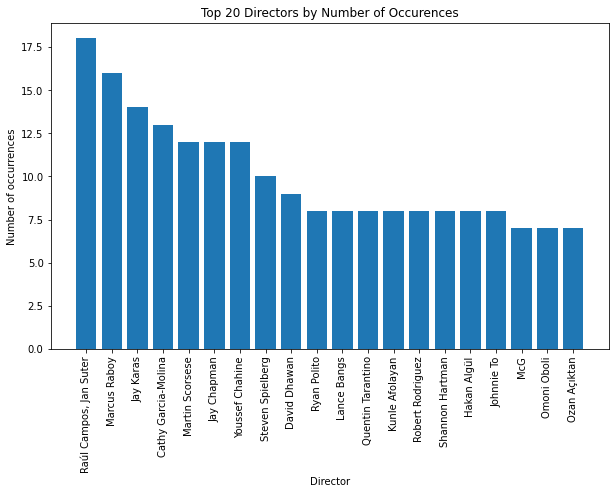

In [40]:
# get the list of directors
df_director = df.explode('director')

# group by directors and count the number of occurrences
df_director_count = df_director.groupby('director').size().reset_index(name='count')

# sort the directors by the number of appearances and get the top 20
top_directors = df_director_count.sort_values('count', ascending=False).head(20)

# create a bar chart of the top 20 directors
plt.figure(figsize=(10, 6))
plt.bar(top_directors['director'], top_directors['count'])
plt.xticks(rotation=90)
plt.xlabel('Director')
plt.ylabel('Number of occurrences')
plt.title('Top 20 Directors by Number of Occurences')
plt.show()

We can find the most 20 directors in this chart. And the directors with high occurences are not very famous. Some of them are MV directors such as Raul Campos and Marcus Raboy


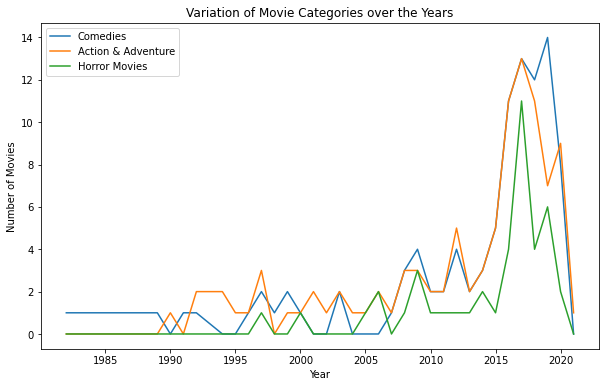

In [52]:
df_listed_in = df.assign(category=df['listed_in'].str.split(',')).explode('listed_in')

# filter the dataframe to include only the three desired categories
df_categories = df_listed_in.query("listed_in in ['Comedies', 'Action & Adventure', 'Horror Movies']")

# group by year and different kind of movie and count the number of movies each year in each category
categories_by_year = df_categories.groupby(['release_year', 'listed_in']).size().reset_index(name='count')

# pivot the data so that each category becomes a column
categories_pivot = categories_by_year.pivot(index='release_year', columns='listed_in', values='count').fillna(0)

# create a line graph of the three categories over the years
plt.figure(figsize=(10, 6))
plt.plot(categories_pivot.index, categories_pivot['Comedies'], label='Comedies')
plt.plot(categories_pivot.index, categories_pivot['Action & Adventure'], label='Action & Adventure')
plt.plot(categories_pivot.index, categories_pivot['Horror Movies'], label='Horror Movies')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Variation of Movie Categories over the Years')
plt.show()

The trend of three different movies are similar. The number of movies have risen significantly since 2006/2007. Overall the number of horror movies is always lower than other two kind movies. The action movies appear latest almost 1987. But the horror movies and comedies appeared earlier even before 1980. 

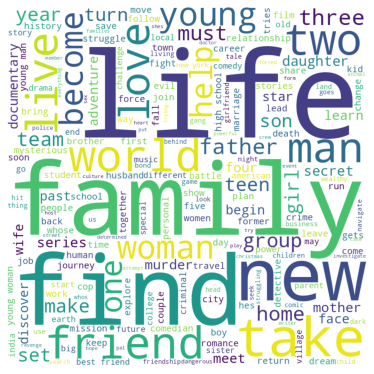

In [49]:
# Create a word cloud visualization
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = STOPWORDS, min_font_size = 10).generate(' '.join(df['description'].tolist()))
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


We can use word clouds to analyze the description of movies. The words that appear more often are 'find', 'family', 'life', 'friend' and so on. We can find that most of movies have a positive theme 

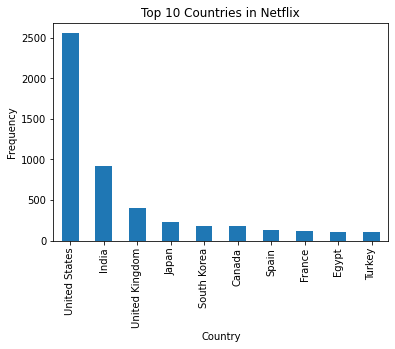

In [51]:
#count the number of country
top_10 = df['country'].value_counts().head(10)

# add labels to the plot
top_10.plot(kind='bar')
plt.title('Top 10 Countries in Netflix')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.show()

The most prolific producers of content for Netflix are, the USA India and the UK. There is also a significant distance among them.The U.S. has more than three times the number of India.The United States has produced more works than the next nine countries combined.

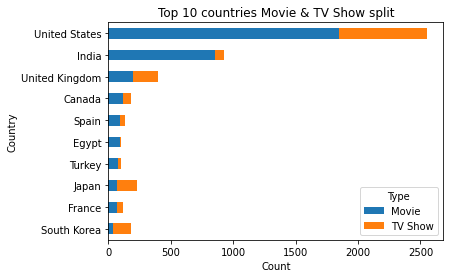

In [47]:
top_10_countries = df['country'].value_counts().head(10).index

# create a crosstab of the count of movies and TV shows for each country
data = pd.crosstab(df[df['country'].isin(top_10_countries)]['country'], df['type'])

# sort the data by the count of movies and plot the horizontal bar chart
data.sort_values(by='Movie', ascending=True).plot(kind='barh', stacked=True)

# add labels to the plot
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Top 10 countries Movie & TV Show ')
plt.legend(loc='lower right', title='Type')
plt.show()

Among the top 10 countries, all except Japan and South Korea have more movies than TV series. The most disparate ratio is in India, where the number of movies is much larger than the number of TV series. The highest ranking country in the previous chart, the United States, has slightly more movies than TV shows.